In [13]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
Peso_Max = 20

# Cobija techo Gafas_de_sol Comida Ro0pa Olla Candela lámpara Papel_Higienico Cantimplora
peso=np.random.randint(1,15,size=(30))
#peso=np.array([3,6,1,2,4,7,1,4,2,5])

#ganancia=np.array([6,10,2,5,4,3,8,7,4,9])
ganancia=np.random.randint(1,10,size=(30))
funcion=lambda x: np.dot(x,ganancia.T)
funcion2=lambda x: np.dot(x,peso.T)

In [14]:
Tm=0.4                    #Tasa de mutacion 
Tc=0.4          #Tasa de cruce  Porcentaje de parejas van a ser seleccionadas para el cruce
population=20 #Tamaño de la poblacion
var=2            #Numero de variables para la funcion
N=10           #Numero de generaciones
alpha= 0.5        #For aritmetic recombination
Pop = (np.random.rand(population,ganancia.shape[0])>0.5)*1
Pop = np.array([])
i=0
while (i<population):
    temp=((np.random.rand(ganancia.shape[0])>0.5)*1)
    if(funcion2(temp)<20):
        Pop=np.append(Pop,temp)
        i+=1
Pop=Pop.reshape(population,-1)
Pop=Pop.astype(int)

gen 0
10
6
4
17
gen 1
18
12
10
1
gen 2
19
11
17
3
gen 3
13
1
9
14
gen 4
14
1
13
7
gen 5
8
6
1
18
gen 6
6
2
17
2
gen 7
6
6
0
16
gen 8
8
10
16
10
gen 9
16
0
12
16


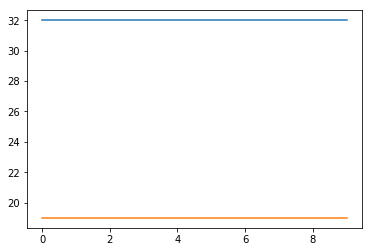

[32. 32. 32. 32. 32. 32. 32. 32. 32. 32.]
[19. 19. 19. 19. 19. 19. 19. 19. 19. 19.]


In [15]:

papa=21
vector=np.array([])
vector2=np.array([])
for gen in range(N):
    print("gen",gen)
    # Fitness evaluation
    Fitness = funcion(Pop)
    
    """print (gen)
    print (Pop)"""
    
    BestIndividuos = np.argsort(-Fitness)
    
    Pop = Pop[BestIndividuos]
    
    Wheel = np.cumsum(Fitness[BestIndividuos])/np.sum(Fitness[BestIndividuos])
    #print(Wheel)
    # Crossover - Wheel 
    
    for parent in range(int(Tc*population/2)):
        
       # while(papa>=20):
        P = np.random.rand(1)
        ParentSelected_1 = np.where(Wheel >= P)[0][0]
        print(ParentSelected_1)
        P = np.random.rand(1)
        ParentSelected_2 = np.where(Wheel >= P)[0][0]
        #print(ParentSelected_2)
        
        #Crossover Aritmetic recombination
        Child_1 = np.append(Pop[ParentSelected_1,:int((alpha)*len(ganancia))],Pop[ParentSelected_2,int(alpha*len(ganancia)):])
        Child_2 = np.append(Pop[ParentSelected_2,:int(alpha*len(ganancia))],Pop[ParentSelected_2,int((alpha)*len(ganancia)):])
        a=funcion2(Child_1)
        b=funcion2(Child_2)
        #print(a,b)
        #print(Child_1,Child_2)
            #Add to population
        if(a<=Peso_Max):
            Pop = np.append(Pop,Child_1[None,:],axis=0)
            #print("aqui1")
        elif(b<=Peso_Max):
            Pop = np.append(Pop,Child_2[None,:],axis=0)
            #print("aqui2")
            #print(ParentSelected_1)
    
    # Mutation - Wheel
    for parent in range(int(Tm*population)):
        P = np.random.rand(1)
        ParentSelected = np.where(Wheel >= P)[0][0]
        
        #Add to population
        Child_1 = Pop[ParentSelected]
        if (funcion2(Child_1)<20):
            Pop = np.append(Pop,Child_1[None,:],axis=0)
        
    #Selection
    Fitness = funcion(Pop)
    #print(Fitness)
    
    
    BestIndividuos = np.argsort(-Fitness)
    #print(Fitness)
    Pop = Pop[BestIndividuos[:population],:]
    
    #plt.plot(gen,max(funcion(Pop)),'.')
    vector=np.append(vector,max(funcion(Pop)))
    vector2=np.append(vector2,funcion2(Pop)[np.where(funcion(Pop)==max(funcion(Pop)))[0][0]])
plt.plot(vector)
plt.plot(vector2)
plt.show()
print(vector)
print(vector2)